### Ameya on 10-April-2017 for AppMeter
### This file has logic for Statsmodel OLS as well as sklearn LinearRegression
### Both methods are used to predict the number of downloads

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
from math import log

# this allows plots to appear directly in the notebook
%matplotlib inline


In [3]:
#data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
#data1 = pd.read_csv("union.csv", low_memory=False)
#data1 = pd.read_excel("union2.xlsx")
AllCleanedApps = pd.read_csv("CleanedApps.csv")
SeventyFivepercentdata = pd.read_csv("75percent-data.csv")
SeventyFivepercentdata.shape
AllCleanedApps.shape

SeventyFivepercentdataWithoutLogs = SeventyFivepercentdata.copy()
SeventyFivepercentdata.head(10)

(245001, 8)

(329809, 8)

,Unnamed: 0,Random,Name,Downloads,Size,Price,AvgR,Raters
0,0,0.550750,Merry Christmas 2014 WPs,100,5600.0,0.10,2.50,2
1,1,0.690841,GuiaTDT,1000,1200.0,0.10,3.73,11
2,2,0.191126,???? ?????? GPS,50000,857.0,0.10,4.01,172
3,3,0.463945,Spritual Gifts,500,2700.0,0.10,3.58,12
4,4,0.121634,Space War SE,100,4200.0,0.99,3.60,5
5,5,0.688138,Herm�s Tie Break,5000,48000.0,0.10,4.23,163
6,6,0.653488,Dialer 2014 ????,500,569.0,0.10,3.50,2
7,7,0.424609,File Explorer for SmartWatch 2,1000,184.0,1.58,3.58,36
8,8,0.138247,Scary Fun + Face Recorder,10,5700.0,0.69,3.17,6
9,9,0.111756,ECU=SHOP Sticker,10000,17000.0,0.10,4.43,456


In [4]:
#Change the table values to log values
import math
def toLog(x):
    y = x
    if x == 0:
        y = 0.1
    return math.log(y)



In [5]:
AllCleanedApps["Downloads"] = AllCleanedApps.Downloads.apply(toLog)
AllCleanedApps["Size"] = AllCleanedApps.Size.apply(toLog)
#AllCleanedApps["Price"] = AllCleanedApps.Price.apply(toLog)
#AllCleanedApps["AvgR"] = AllCleanedApps.AvgR.apply(toLog)
AllCleanedApps["Raters"] = AllCleanedApps.Raters.apply(toLog)

In [6]:
SeventyFivepercentdata["Downloads"] = SeventyFivepercentdata.Downloads.apply(toLog)
SeventyFivepercentdata["Size"] = SeventyFivepercentdata.Size.apply(toLog)
#SeventyFivepercentdata["Price"] = SeventyFivepercentdata.Price.apply(toLog)
#SeventyFivepercentdata["AvgR"] = SeventyFivepercentdata.AvgR.apply(toLog)
SeventyFivepercentdata["Raters"] = SeventyFivepercentdata.Raters.apply(toLog)

In [291]:
import statsmodels.formula.api as smf


SeventyFivepercentdataWithoutLogsAnswer = smf.ols(formula='Downloads ~ Price + AvgR + Raters + Size', data=SeventyFivepercentdataWithoutLogs).fit()
print("\nCoefficients for 75% android apps without logs\n")
SeventyFivepercentdataWithoutLogsAnswer.params

type(SeventyFivepercentdataWithoutLogsAnswer)

AllCleanedAppsAnswer = smf.ols(formula='Downloads ~ AvgR', data=AllCleanedApps).fit()
print("\nCoefficients for all Cleaned android apps after taking log values\n")
AllCleanedAppsAnswer.params

SeventyFivepercentdataAnswer = smf.ols(formula='Downloads ~ AvgR', data=SeventyFivepercentdata).fit()
print("\nCoefficients for Cleaned 75 % android apps after taking log values\n")
#SeventyFivepercentdataAnswer.params

#print(SeventyFivepercentdataWithoutLogsAnswer.summary())


Coefficients for 75% android apps without logs



Intercept    57780.910267
Price        -1835.580584
AvgR         -7778.116270
Raters          27.571452
Size            -0.104426
dtype: float64

statsmodels.regression.linear_model.RegressionResultsWrapper


Coefficients for all Cleaned android apps after taking log values



Intercept    9.962719
AvgR        -0.697742
dtype: float64


Coefficients for Cleaned 75 % android apps after taking log values



In [296]:
AllCleanedApps= AllCleanedApps.ix[AllCleanedApps.Downloads > 5, :]
y=AllCleanedApps['Downloads']
X=AllCleanedApps.drop(['Downloads', 'Name','Unnamed: 0', 'Random'], axis=1)
y.shape
X.shape

(224348L,)

(224348, 4)

In [280]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

from sklearn.model_selection import train_test_split
X_tr, X_test, y_tr, y_test = train_test_split(X,y,test_size=0.3)

X_tr.shape,y_tr.shape,X_test.shape, y_test.shape
X_tr.head(3)
y_tr.head(3)
#y_test.sort_values(ascending=False)

((157043, 4), (157043L,), (67305, 4), (67305L,))

,Size,Price,AvgR,Raters
238487,9.903488,0.1,4.58,4.867534
231177,9.546813,0.1,3.80,7.511525
151866,6.297109,0.1,3.38,5.147494


238487     8.517193
231177    11.512925
151866    11.512925
Name: Downloads, dtype: float64

In [281]:
lr.fit(X_tr,y_tr)
y_pred= lr.predict(X_test)

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
print('mse:',mean_squared_error(y_test,y_pred))
print('r2_score:',r2_score(y_test, y_pred))
y_test.shape
y_pred.shape
y_test.head(5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

('mse:', 0.79991787183094565)
('r2_score:', 0.80196112810535158)


(67305L,)

(67305L,)

260743     9.210340
219051    13.815511
329119     9.210340
298842     6.907755
110339     9.210340
Name: Downloads, dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LinearRegression(), X, y).mean())

6.2146080984221914

18.420680743952367

-7.210514143304378

16.720622253299602

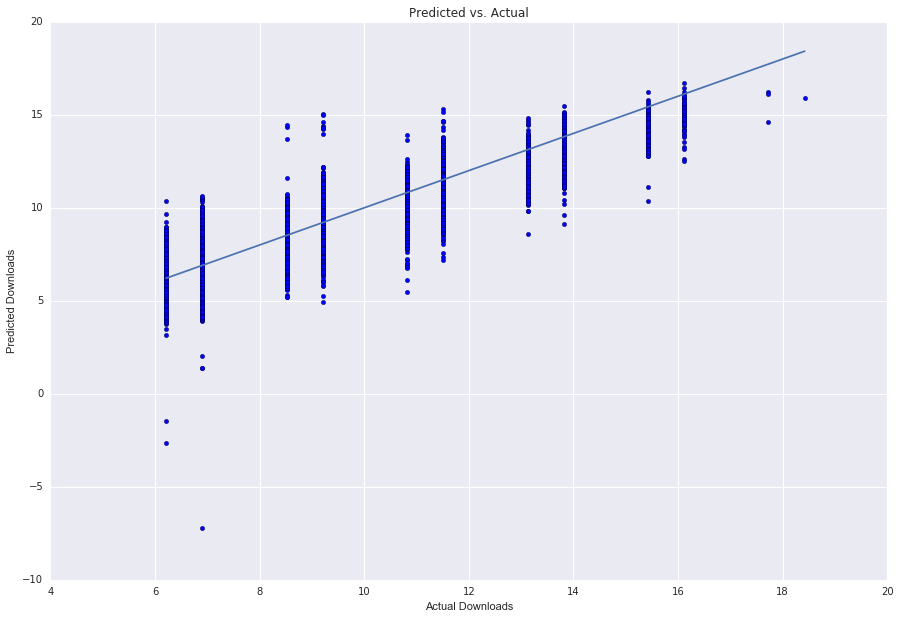

In [255]:
import matplotlib.pylab as plt
% matplotlib inline
plt.figure(figsize=(15, 10))
min(y_test)
max(y_test)
min(y_pred)
max(y_pred)
#y_test = np.linspace(0, y_test.max, 50)
plt.scatter(y_test, y_pred)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Downloads')
plt.ylabel('Predicted Downloads')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
#plt.tight_layout()